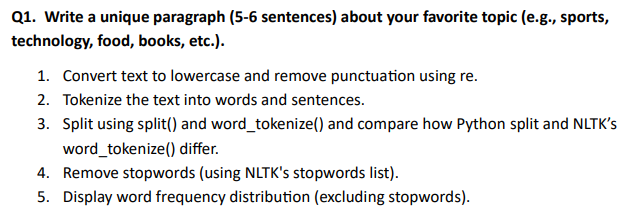

In [6]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Step 1: Original paragraph
text = """Books are portals to different worlds. I enjoy reading historical fiction, especially novels that bring ancient civilizations to life. The smell of old pages and the thrill of a good plot make reading an unmatched experience. Sometimes, I lose track of time while reading. It's both relaxing and stimulating."""

# Step 2: Convert to lowercase & remove punctuation using re
clean_text = re.sub(r'[^\w\s]', '', text.lower())

# Step 3: Tokenize into sentences and words
sentences = sent_tokenize(text)
word_tokens_nltk = word_tokenize(clean_text)

# Step 4: Tokenize using split() for comparison
word_tokens_split = clean_text.split()

# Display differences
print("Sentences:\n", sentences, "\n")
print("Word Tokens using split():\n", word_tokens_split, "\n")
print("Word Tokens using word_tokenize():\n", word_tokens_nltk, "\n")

# Step 5: Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens_nltk if word not in stop_words]
print("Filtered Words (no stopwords):\n", filtered_words, "\n")

# Step 6: Display word frequency distribution
fdist = FreqDist(filtered_words)
print("Word Frequency Distribution:\n", fdist.most_common())



Sentences:
 ['Books are portals to different worlds.', 'I enjoy reading historical fiction, especially novels that bring ancient civilizations to life.', 'The smell of old pages and the thrill of a good plot make reading an unmatched experience.', 'Sometimes, I lose track of time while reading.', "It's both relaxing and stimulating."] 

Word Tokens using split():
 ['books', 'are', 'portals', 'to', 'different', 'worlds', 'i', 'enjoy', 'reading', 'historical', 'fiction', 'especially', 'novels', 'that', 'bring', 'ancient', 'civilizations', 'to', 'life', 'the', 'smell', 'of', 'old', 'pages', 'and', 'the', 'thrill', 'of', 'a', 'good', 'plot', 'make', 'reading', 'an', 'unmatched', 'experience', 'sometimes', 'i', 'lose', 'track', 'of', 'time', 'while', 'reading', 'its', 'both', 'relaxing', 'and', 'stimulating'] 

Word Tokens using word_tokenize():
 ['books', 'are', 'portals', 'to', 'different', 'worlds', 'i', 'enjoy', 'reading', 'historical', 'fiction', 'especially', 'novels', 'that', 'bring'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


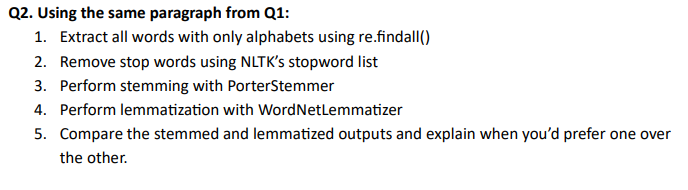

In [9]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# Words
lowercase_text = text.lower()
alpha_words = re.findall(r'\b[a-zA-Z]+\b', lowercase_text)

# stopwords
filtered_alpha = [w for w in alpha_words if w not in stop_words]

# Stemming
ps = PorterStemmer()
stemmed = [ps.stem(w) for w in filtered_alpha]

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(w) for w in filtered_alpha]

# Comparison
print("Stemmed Words:\n", stemmed)
print("Lemmatized Words:\n", lemmatized)

# Explain
print("\nStemming is faster but less accurate, lemmatization is more linguistically correct. Prefer lemmatization for high-quality NLP tasks.")

Stemmed Words:
 ['book', 'portal', 'differ', 'world', 'enjoy', 'read', 'histor', 'fiction', 'especi', 'novel', 'bring', 'ancient', 'civil', 'life', 'smell', 'old', 'page', 'thrill', 'good', 'plot', 'make', 'read', 'unmatch', 'experi', 'sometim', 'lose', 'track', 'time', 'read', 'relax', 'stimul']
Lemmatized Words:
 ['book', 'portal', 'different', 'world', 'enjoy', 'reading', 'historical', 'fiction', 'especially', 'novel', 'bring', 'ancient', 'civilization', 'life', 'smell', 'old', 'page', 'thrill', 'good', 'plot', 'make', 'reading', 'unmatched', 'experience', 'sometimes', 'lose', 'track', 'time', 'reading', 'relaxing', 'stimulating']

Stemming is faster but less accurate, lemmatization is more linguistically correct. Prefer lemmatization for high-quality NLP tasks.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


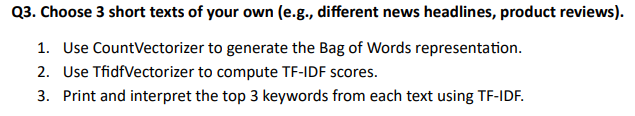

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

texts = [
    "The camera quality of this phone is excellent and worth the price.",
    "This laptop has great battery life but the screen resolution is average.",
    "Amazing sound quality and comfortable fit – best headphones I've used!"
]

count_vec = CountVectorizer()
bow = count_vec.fit_transform(texts)

print("=== Bag of Words Matrix ===")
print(bow.toarray())
print("Vocabulary:", count_vec.get_feature_names_out())
print()
tfidf_vec = TfidfVectorizer()
tfidf_matrix = tfidf_vec.fit_transform(texts)
feature_names = tfidf_vec.get_feature_names_out()

print("=== TF-IDF Matrix ===")
print(np.round(tfidf_matrix.toarray(), 2))
print()
print("=== Top 3 Keywords from Each Text ===")
for i, row in enumerate(tfidf_matrix):
    row_data = row.toarray().flatten()
    top_indices = row_data.argsort()[-3:][::-1]
    keywords = [(feature_names[idx], round(row_data[idx], 3)) for idx in top_indices]
    print(f"Text {i+1} Top Keywords: {keywords}")


=== Bag of Words Matrix ===
[[0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 2 1 0 0 1]
 [0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0]
 [1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0]]
Vocabulary: ['amazing' 'and' 'average' 'battery' 'best' 'but' 'camera' 'comfortable'
 'excellent' 'fit' 'great' 'has' 'headphones' 'is' 'laptop' 'life' 'of'
 'phone' 'price' 'quality' 'resolution' 'screen' 'sound' 'the' 'this'
 'used' 've' 'worth']

=== TF-IDF Matrix ===
[[0.   0.23 0.   0.   0.   0.   0.31 0.   0.31 0.   0.   0.   0.   0.23
  0.   0.   0.31 0.31 0.31 0.23 0.   0.   0.   0.47 0.23 0.   0.   0.31]
 [0.   0.   0.31 0.31 0.   0.31 0.   0.   0.   0.   0.31 0.31 0.   0.23
  0.31 0.31 0.   0.   0.   0.   0.31 0.31 0.   0.23 0.23 0.   0.   0.  ]
 [0.33 0.25 0.   0.   0.33 0.   0.   0.33 0.   0.33 0.   0.   0.33 0.
  0.   0.   0.   0.   0.   0.25 0.   0.   0.33 0.   0.   0.33 0.33 0.  ]]

=== Top 3 Keywords from Each Text ===
Text 1 Top Keywords: [('the', np.float64(0.467)),

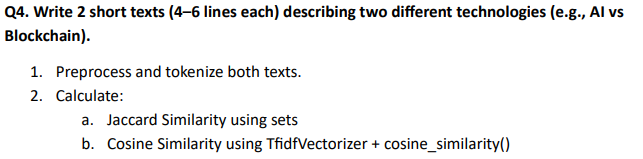


image.png

In [11]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

text1 = """Artificial Intelligence enables machines to learn from data and make decisions.
It powers applications like speech recognition, recommendation systems, and self-driving cars."""

text2 = """Blockchain is a decentralized ledger technology used for secure and transparent transactions.
It underpins cryptocurrencies and removes the need for central authorities."""

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return set(text.split())

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

jaccard_sim = len(tokens1.intersection(tokens2)) / len(tokens1.union(tokens2))
print(f"Jaccard Similarity: {jaccard_sim:.4f}")

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform([text1, text2])
cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
print(f"Cosine Similarity: {cos_sim:.4f}")

print("\nInterpretation:")
if jaccard_sim < cos_sim:
    print("Cosine Similarity captures deeper semantic similarity based on word importance (TF-IDF).")
    print("Jaccard is more surface-level and better for simple set-based comparisons.")
else:
    print("Jaccard and Cosine give similar insights here, likely because the texts have limited shared terms.")


Jaccard Similarity: 0.0513
Cosine Similarity: 0.1123

Interpretation:
Cosine Similarity captures deeper semantic similarity based on word importance (TF-IDF).
Jaccard is more surface-level and better for simple set-based comparisons.


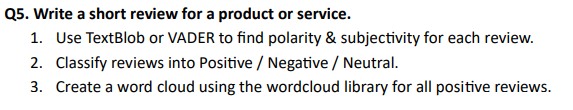

=== Sentiment Analysis ===
Review: This laptop is fast, lightweight, and perfect for everyday use!
Polarity: 0.32, Subjectivity: 0.73, Sentiment: Positive

Review: Battery life is terrible and the screen flickers sometimes.
Polarity: -1.00, Subjectivity: 1.00, Sentiment: Negative

Review: It’s okay for the price, not too bad but nothing exceptional.
Polarity: 0.16, Subjectivity: 0.72, Sentiment: Positive

Review: Absolutely love the performance and build quality!
Polarity: 0.62, Subjectivity: 0.60, Sentiment: Positive

Review: Customer support was unhelpful and rude.
Polarity: -0.30, Subjectivity: 0.60, Sentiment: Negative



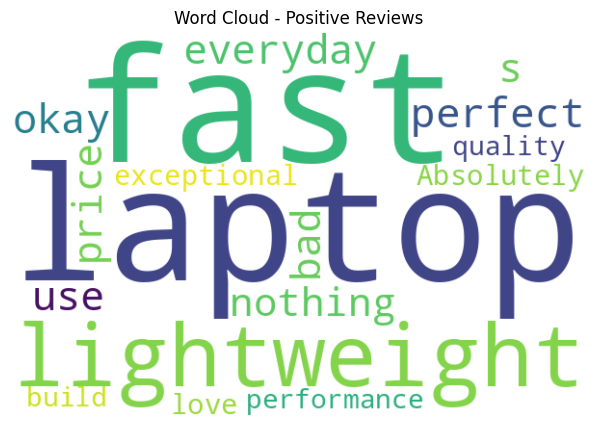

In [12]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Sample product reviews
reviews = [
    "This laptop is fast, lightweight, and perfect for everyday use!",
    "Battery life is terrible and the screen flickers sometimes.",
    "It’s okay for the price, not too bad but nothing exceptional.",
    "Absolutely love the performance and build quality!",
    "Customer support was unhelpful and rude."
]

# Analyze
results = []
positive_text = ""

print("=== Sentiment Analysis ===")
for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    sentiment = "Positive" if polarity > 0.1 else "Negative" if polarity < -0.1 else "Neutral"

    results.append((review, polarity, subjectivity, sentiment))

    if sentiment == "Positive":
        positive_text += review + " "

    print(f"Review: {review}")
    print(f"Polarity: {polarity:.2f}, Subjectivity: {subjectivity:.2f}, Sentiment: {sentiment}\n")

# Create Word Cloud
if positive_text.strip():
    wc = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
    plt.figure(figsize=(8, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud - Positive Reviews")
    plt.show()
else:
    print("No positive reviews to display in word cloud.")


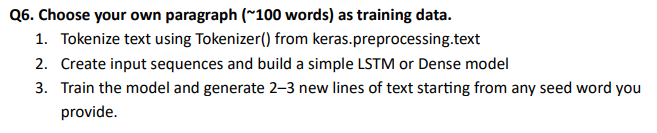

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# 100-word paragraph
text = """
Artificial Intelligence is transforming the world by enabling machines to learn and adapt.
From healthcare to transportation, AI is enhancing productivity, automating tasks, and uncovering new insights.
With deep learning, machines recognize patterns in massive datasets, leading to breakthroughs in speech and vision.
However, ethical considerations and responsible development are crucial to ensure AI benefits everyone.
The future of technology will be driven by innovation, data, and intelligent systems that continuously evolve.
"""

# 2. Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
words = text.lower().split()
for i in range(1, len(words)):
    seq = words[:i+1]
    token_list = tokenizer.texts_to_sequences([' '.join(seq)])[0]
    input_sequences.append(token_list)

# Pad sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_seq_len = max(len(x) for x in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Features and labels
X = input_sequences[:, :-1]
y = to_categorical(input_sequences[:, -1], num_classes=total_words)

# Build LSTM
model = Sequential([
    Embedding(input_dim=total_words, output_dim=10, input_length=max_seq_len - 1),
    LSTM(100),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=0)

# Generate new lines
def generate_text(seed_text, next_words=10):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len - 1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        next_index = np.argmax(predicted)
        for word, index in tokenizer.word_index.items():
            if index == next_index:
                seed_text += ' ' + word
                break
    return seed_text

# Example generatee
print("Generated Text:\n", generate_text("artificial", next_words=15))


Generated Text:
 artificial intelligence transforming transforming transforming transforming is is is learn to to to to to to
